In [1]:

from PIL import Image
import torch
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from PIL import Image
from tqdm.auto import tqdm
import plotly.graph_objects as go

from point_e.models.download import load_checkpoint
from point_e.models.configs import MODEL_CONFIGS, model_from_config
from point_e.util.pc_to_mesh import marching_cubes_mesh
from point_e.util.plotting import plot_point_cloud, plot_3D
from point_e.util.point_cloud import PointCloud

In [2]:
%load_ext autoreload
%autoreload 2

In [29]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print('creating SDF model...')
name = 'sdf'
model = model_from_config(MODEL_CONFIGS[name], device)
model.eval()

print('loading SDF model...')
model.load_state_dict(load_checkpoint(name, device))

creating SDF model...
loading SDF model...


  0%|          | 0.00/38.0M [00:00<?, ?iB/s]

<All keys matched successfully>

(4096, 3)

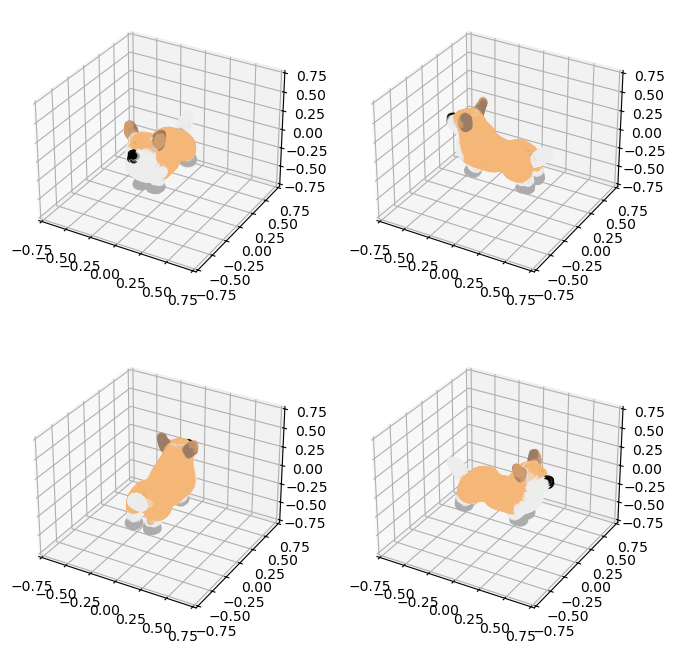

In [3]:
# Load a point cloud we want to convert into a mesh.
pc = PointCloud.load('point_e\examples\example_data\pc_corgi.npz')

# Plot the point cloud as a sanity check.
fig = plot_point_cloud(pc, grid_size=2)

In [4]:
# Plot the point cloud as a sanity check.
pc = PointCloud.load('point_e\examples\example_data\pc_corgi.npz')
pc = pc.move_point(index = 300, num_neighbors = 300, vector = [0, 0, 0])
# pc = pc.get_neighbors_cloud(index = 163, num_neighbors = 100)
#plot the point cloud labels for each point
plot_3D(pc, axis_labels = True)

In [24]:
pc = PointCloud.load('point_e\examples\example_data\pc_corgi.npz')
pc.coords[:, 2]

array([ 0.13058445, -0.16568671, -0.24513257, ..., -0.23039396,
        0.09210243, -0.13293786], dtype=float32)

In [25]:
pc_new = pc.fake_point_cloud(0.3, 5)

In [27]:
plot_3D(pc_new)

In [ ]:
# Produce a mesh (with vertex colors)
mesh = marching_cubes_mesh(
    pc=pc,
    model=model,
    batch_size=4096,
    grid_size=32, # increase to 128 for resolution used in evals
    progress=True,
)

In [ ]:
# Write the mesh to a PLY file to import into some other program.
with open('mesh.ply', 'wb') as f:
    mesh.write_ply(f)